<a href="https://colab.research.google.com/github/DmytroZavhorodnii/DmytroZavhorodnii.github.io/blob/master/CS_PWR/darts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Darts - LISTA1 - Dmytro Zavhorodnii

Wartość statystyki Shapiro-Wilka: 0.9271634610503064
Wartość p: 3.448055100101802e-05
Dane nie mają rozkładu normalnego (p <= 0.05), co może podważać test Studenta
Statystyka t: -7.701125391349743
Wartość krytyczna t: 1.6603911559963895
Brak podstaw do odrzucenia hipotezy zerowej.
Wyniki punktowe: [5, 1, 0, 3, 0, 1, 0, 5, 5, 1, 1, 3, 0, 7, 1, 2, 6, 3, 2, 7, 5, 0, 6, 7, 4, 1, 8, 4, 0, 7, 2, 4, 6, 0, 1, 7, 1, 3, 6, 6, 1, 4, 8, 5, 1, 1, 3, 1, 0, 0, 5, 10, 3, 5, 3, 1, 0, 2, 3, 3, 2, 6, 4, 0, 1, 3, 1, 2, 5, 5, 2, 2, 6, 8, 3, 3, 5, 0, 0, 0, 0, 0, 4, 7, 5, 3, 6, 0, 3, 0, 2, 4, 4, 1, 0, 4, 8, 3, 2, 4]
Średnia: 3.08
Odchylenie standardowe: 2.49314210901777


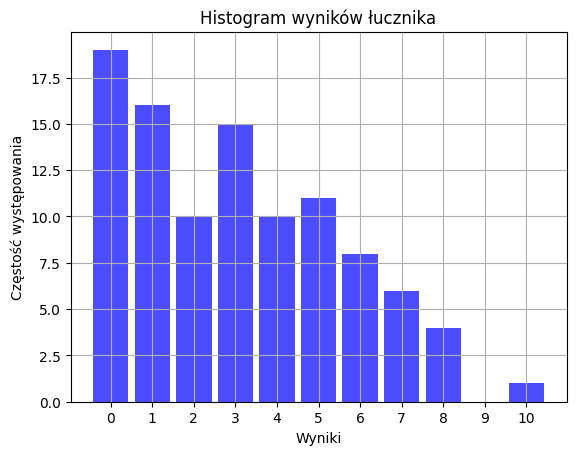

Oczekiwane częstości: [9.09090909 9.09090909 9.09090909 9.09090909 9.09090909 9.09090909
 9.09090909 9.09090909 9.09090909 9.09090909 9.09090909]
Wszystkie oczekiwane częstości są większe lub równe 5.
Statystyka Chi-kwadrat: 40.8
Wartość krytyczna Chi-kwadrat: 18.307038053275146
Odrzucamy hipotezę zerową o rozkładzie równomiernym.


In [36]:
n = 100
x_c = []
y_c = []
res_xy = []
point_xy = []

for i in range(n):
    x_c.append(random.uniform(0, 40))
    y_c.append(random.uniform(0, 40))
    res_xy.append(math.sqrt(math.pow(20 - x_c[i], 2) + math.pow(20 - y_c[i], 2)))


    category = max(0, 10 - int(res_xy[i] // 2))
    point_xy.append(category)


shapiro_stat, p_value_shapiro = stats.shapiro(point_xy)
print(f"Wartość statystyki Shapiro-Wilka: {shapiro_stat}")
print(f"Wartość p: {p_value_shapiro}")

if p_value_shapiro > 0.05:
    print("Dane mają rozkład normalny (p > 0.05)")
else:
    print("Dane nie mają rozkładu normalnego (p <= 0.05), co może podważać test Studenta")

# Testowanie hipotezy o średniej
# Hipoteza H0: średnia wyników = 5, H1: średnia wyników > 5
mu_0 = 5  # średnia z hipotezy zerowej

# Obliczenie średniej i odchylenia standardowego
mean_x = np.mean(point_xy)
std_x = np.std(point_xy, ddof=1)  # ddof=1, bo obliczamy dla próby

# Obliczenie statystyki t
t_statistic = (mean_x - mu_0) / (std_x / np.sqrt(n))

# Wartość krytyczna dla t-Studenta (jednostronny test, alfa = 0.05, df = n-1)
alpha = 0.05
df = n - 1  # stopnie swobody
t_critical = stats.t.ppf(1 - alpha, df)

# Wyniki testu t-Studenta
print(f"Statystyka t: {t_statistic}")
print(f"Wartość krytyczna t: {t_critical}")

if t_statistic > t_critical:
    print("Odrzucamy hipotezę zerową. Średnia jest statystycznie istotnie większa od 5.")
else:
    print("Brak podstaw do odrzucenia hipotezy zerowej.")

# Statystyki
print(f"Wyniki punktowe: {point_xy}")
print(f"Średnia: {mean_x}")
print(f"Odchylenie standardowe: {std_x}")

# d) Rysowanie histogramu z poprawioną osią Y (częstość występowania)
plt.hist(point_xy, bins=np.arange(-0.5, 11.5, 1), alpha=0.7, color='blue', rwidth=0.85)
plt.title('Histogram wyników łucznika')
plt.xlabel('Wyniki')
plt.ylabel('Częstość występowania')
plt.xticks(range(11))
plt.grid(True)
plt.show()

# e) Test Chi-kwadrat
# Hipoteza H0: rozkład wyników jest równomierny, H1: rozkład wyników nie jest równomierny
# Częstości obserwowanych wyników
observed_counts = np.bincount(point_xy, minlength=11)

# Wartości w rozкладе równомierном
expected_counts = np.full(11, n / 11)

# Sprawdzanie, czy oczekiwane wartości są większe lub równe 5
print(f"Oczekiwane częstości: {expected_counts}")

if np.any(expected_counts < 5):
    print("Uwaga: niektóre oczekiwane częstości są mniejsze niż 5, co może wpływać na wynik testu Chi-kwadrat.")
else:
    print("Wszystkie oczekiwane częstości są większe lub równe 5.")

# Обчисление статистики Chi-квадрат вручную
chi2_statistic = np.sum((observed_counts - expected_counts) ** 2 / expected_counts)

# Chi-квадрат для alfa = 0.05 и df = 10 (11 kategorii - 1)
chi2_critical = stats.chi2.ppf(1 - 0.05, df=10)

# Wyniki тесту Chi-квадрат
print(f"Statystyka Chi-kwadrat: {chi2_statistic}")
print(f"Wartość krytyczna Chi-kwadrat: {chi2_critical}")

if chi2_statistic > chi2_critical:
    print("Odrzucamy hipotezę zerową o rozkładzie równomiernym.")
else:
    print("Brak podstaw do odrzucenia hipotezy o rozkładzie równomiernym.")
